In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/food-101")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 9.38G/9.38G [42:22<00:00, 3.96MB/s]

Extracting files...


Path to dataset files: C:\Users\heewo\.cache\kagglehub\datasets\dansbecker\food-101\versions\1


In [21]:
pip install pillow matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [23]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 데이터 경로
images_path = r"C:\Users\heewo\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images"

# 대상 이미지 크기 (Width x Height)
target_size = (128, 128)  # 원하는 크기로 조정

# 클래스 디렉토리 필터링
classes = [cls for cls in os.listdir(images_path) if os.path.isdir(os.path.join(images_path, cls))]
print("클래스:", classes[:5])  # 일부 클래스 출력

# 모든 클래스에서 이미지 불러오기 및 크기 조정
image_data = []  # 이미지를 저장할 리스트
labels = []      # 각 이미지의 레이블 저장

for class_idx, cls in enumerate(classes[:3]):  # 예제로 클래스 3개만 사용 (전체는 classes 사용)
    class_path = os.path.join(images_path, cls)
    images_in_class = [
        img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]
    
    for img_name in images_in_class[:5]:  # 각 클래스에서 5개 이미지만 예제로 사용 (전체는 images_in_class 사용)
        img_path = os.path.join(class_path, img_name)
        try:
            # 이미지 열기 및 크기 조정
            img = Image.open(img_path).convert("RGB")  # 흑백 이미지 문제 방지
            img_resized = img.resize(target_size)
            
            # 이미지를 NumPy 배열로 변환 후 저장
            image_data.append(np.array(img_resized))
            labels.append(cls)
        except Exception as e:
            print(f"이미지 로드 실패: {img_path}, 오류: {e}")

print(f"불러온 이미지 개수: {len(image_data)}")
print(f"레이블 개수: {len(labels)}")

# NumPy 배열로 변환
image_data = np.array(image_data)  # 이미지 배열
labels = np.array(labels)          # 레이블 배열

print("이미지 배열 형태:", image_data.shape)
print("레이블 배열 형태:", labels.shape)


클래스: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']
불러온 이미지 개수: 15
레이블 개수: 15
이미지 배열 형태: (15, 128, 128, 3)
레이블 배열 형태: (15,)


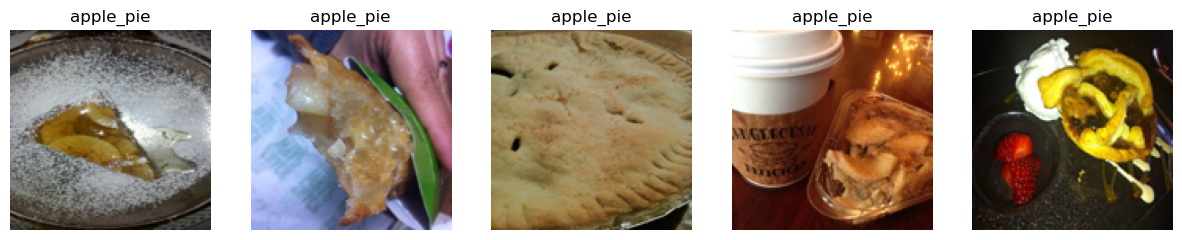

In [29]:
# 데이터 시각화
def plot_images(images, labels, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
    plt.show()

# 시각화 예시
plot_images(image_data, labels, n=5)


In [48]:
import os
from PIL import Image
import numpy as np

# 데이터셋 경로
images_path = r"C:\Users\heewo\.cache\kagglehub\datasets\dansbecker\food-101\versions\1\food-101\food-101\images"
target_size = (128, 128)  # 이미지 크기
classes = os.listdir(images_path)


In [50]:
# '애플파이' 클래스와 다른 클래스 분리
apple_pie_class = "apple_pie"
other_classes = [cls for cls in classes if cls != apple_pie_class]


In [52]:
def load_images(class_names, is_target, max_per_class=100):
    images = []
    labels = []
    for cls in class_names:
        class_path = os.path.join(images_path, cls)
        
        # 이미지 파일만 가져오기 (디렉토리 제외)
        image_files = [
            os.path.join(class_path, img) for img in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, img)) and img.lower().endswith(('.png', '.jpg', '.jpeg')) and not img.startswith('.')
        ]
        
        # 이미지 읽기 및 리사이즈
        for img_path in image_files[:max_per_class]:
            try:
                img = Image.open(img_path).convert("RGB")
                img_resized = img.resize(target_size)
                images.append(np.array(img_resized))
                labels.append(1 if is_target else 0)  # 1: 애플파이, 0: 비애플파이
            except Exception as e:
                print(f"이미지 로드 오류: {img_path}, 오류: {e}")
    return images, labels


In [54]:
# 애플파이 이미지 불러오기
apple_pie_images, apple_pie_labels = load_images([apple_pie_class], is_target=True)

# 비애플파이 이미지 불러오기
not_apple_pie_images = []
not_apple_pie_labels = []
for cls in other_classes:
    try:
        images, labels = load_images([cls], is_target=False)
        not_apple_pie_images.extend(images)
        not_apple_pie_labels.extend(labels)
    except Exception as e:
        print(f"클래스 {cls}에서 오류 발생: {e}")


클래스 .DS_Store에서 오류 발생: [WinError 267] 디렉터리 이름이 올바르지 않습니다: 'C:\\Users\\heewo\\.cache\\kagglehub\\datasets\\dansbecker\\food-101\\versions\\1\\food-101\\food-101\\images\\.DS_Store'


In [55]:
# 데이터 병합
images = np.array(apple_pie_images + not_apple_pie_images)
labels = np.array(apple_pie_labels + not_apple_pie_labels)

print("이미지 로드 완료!")


이미지 로드 완료!
